In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import chardet
with open(r"C:\Users\sivas\OneDrive\Documents\Data Analyst Projects\Project 2\cleaned_superstore using python.csv","rb") as file:
    dt = file.read(50000)
    res = chardet.detect(dt)
print(res)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [6]:
data = pd.read_excel(r"C:\Users\sivas\OneDrive\Documents\Data Analyst Projects\Project 2\cleaned_superstore using python.xlsx")

In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
data["Postal Code"] = data["Postal Code"].astype("string")

In [12]:
Total_Customers = data["Customer ID"].nunique()

In [13]:
Total_Customers

793

In [14]:
Segment_Sales = data.groupby("Segment")["Sales"].sum().reset_index()

In [15]:
Segment_Sales

,Segment,Sales
0,Consumer,1157671.50
1,Corporate,706146.44
2,Home Office,429653.29


Text(0.5, 1.0, 'Segment Vs Sales')

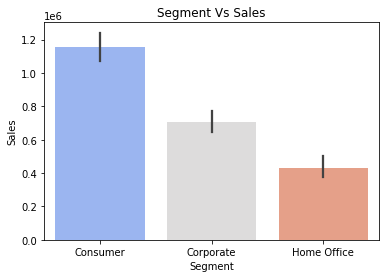

In [16]:
Segment_Sales_Visual = sns.barplot(data = data, x = "Segment", y = "Sales", hue ="Segment", estimator = sum,   palette = "coolwarm")
plt.title("Segment Vs Sales")

In [17]:
Region_Sales = data.groupby("Region")["Sales"].sum().reset_index()

In [18]:
Region_Sales

,Region,Sales
0,Central,501239.88
1,East,678781.36
2,South,391706.35
3,West,721743.64


Text(0.5, 1.0, 'Region vs Sales')

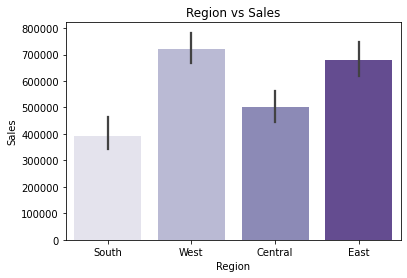

In [19]:
Region_Sales_Visual = sns.barplot(data = data, x = "Region", y = "Sales",hue = "Region", estimator = sum,palette = "Purples")
plt.title("Region vs Sales")

In [20]:
Category_Sales = data.groupby("Category")["Sales"].sum().reset_index()

In [21]:
Category_Sales

,Category,Sales
0,Furniture,740244.94
1,Office Supplies,718890.76
2,Technology,834335.53


Text(0.5, 1.0, 'Category vs Sales')

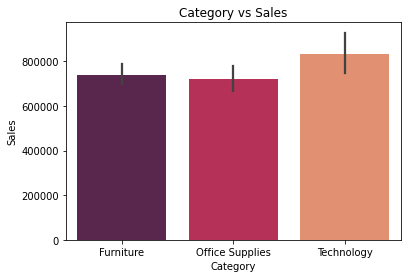

In [22]:
Category_Sales_Visual = sns.barplot(data = data, x = "Category", y = "Sales", hue = "Category", estimator = sum, palette = "rocket")
plt.title("Category vs Sales")

In [24]:
Top_10 = data.groupby("Customer ID").agg({"Customer Name": "first", "Sales" : "sum"})
                                          

In [25]:
Top_10.head()

,Customer Name,Sales
Customer ID,,
AA-10315,Alex Avila,5563.56
AA-10375,Allen Armold,1056.39
AA-10480,Andrew Allen,1774.96
AA-10645,Anna Andreadi,5086.94
AB-10015,Aaron Bergman,886.15


In [26]:
group_customers = data.groupby(["Customer ID", "Customer Name"])["Sales"].sum().reset_index()

In [27]:
Top_10 = group_customers.sort_values(by = "Sales", ascending = False)

In [28]:
Top_10_Customers = Top_10.head(10)

In [29]:
Top_10_Customers

,Customer ID,Customer Name,Sales
700,SM-20320,Sean Miller,25043.07
741,TC-20980,Tamara Chand,19052.22
621,RB-19360,Raymond Buch,15117.35
730,TA-21385,Tom Ashbrook,14595.62
6,AB-10105,Adrian Barton,14473.57
434,KL-16645,Ken Lonsdale,14175.23
669,SC-20095,Sanjit Chand,14142.34
327,HL-15040,Hunter Lopez,12873.30
683,SE-20110,Sanjit Engle,12209.44
131,CC-12370,Christopher Conant,12129.08


In [30]:
# Stage 2

In [31]:
reference_date = data["Order Date"].max() + pd.Timedelta(days = 1)

In [32]:
reference_date

Timestamp('2017-12-31 00:00:00')

In [33]:
rfm = data.groupby(["Customer ID", "Customer Name"]).agg({"Order Date" : lambda x : (reference_date - x.max()).days,
                                        "Order ID" : "nunique",
                                        "Sales" : "sum" })

In [34]:
rfm.rename (columns = {"Order Date" : "Recency", "Order ID" : "Frequency", "Sales" : "Monetary"}, inplace = True)
            

In [35]:
rfm.head()

,,Recency,Frequency,Monetary
Customer ID,Customer Name,,,
AA-10315,Alex Avila,185,5,5563.56
AA-10375,Allen Armold,20,9,1056.39
AA-10480,Andrew Allen,492,3,1774.96
AA-10645,Anna Andreadi,56,6,5086.94
AB-10015,Aaron Bergman,416,3,886.15


In [36]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels = [5,4,3,2,1])

In [37]:
rfm

,,Recency,Frequency,Monetary,R_Score
Customer ID,Customer Name,,,,
AA-10315,Alex Avila,185,5,5563.56,2
AA-10375,Allen Armold,20,9,1056.39,5
AA-10480,Andrew Allen,492,3,1774.96,1
AA-10645,Anna Andreadi,56,6,5086.94,3
AB-10015,Aaron Bergman,416,3,886.15,1
...,...,...,...,...,...
XP-21865,Xylona Preis,44,11,2374.66,4
YC-21895,Yoseph Carroll,5,5,5454.35,5
YS-21880,Yana Sorensen,10,8,6720.44,5


In [38]:
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5]) 

In [39]:
rfm

,,Recency,Frequency,Monetary,R_Score,F_Score
Customer ID,Customer Name,,,,,
AA-10315,Alex Avila,185,5,5563.56,2,2
AA-10375,Allen Armold,20,9,1056.39,5,5
AA-10480,Andrew Allen,492,3,1774.96,1,1
AA-10645,Anna Andreadi,56,6,5086.94,3,3
AB-10015,Aaron Bergman,416,3,886.15,1,1
...,...,...,...,...,...,...
XP-21865,Xylona Preis,44,11,2374.66,4,5
YC-21895,Yoseph Carroll,5,5,5454.35,5,3
YS-21880,Yana Sorensen,10,8,6720.44,5,4


In [40]:
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels = [1,2,3,4,5])

In [41]:
list = Top_10_Customers["Customer ID"].tolist()

In [42]:
list

['SM-20320',
 'TC-20980',
 'RB-19360',
 'TA-21385',
 'AB-10105',
 'KL-16645',
 'SC-20095',
 'HL-15040',
 'SE-20110',
 'CC-12370']

In [43]:
rfm.loc[list]

,,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
Customer ID,Customer Name,,,,,,
SM-20320,Sean Miller,80,5,25043.07,3,2,5
TC-20980,Tamara Chand,400,5,19052.22,1,2,5
RB-19360,Raymond Buch,97,6,15117.35,3,3,5
TA-21385,Tom Ashbrook,70,4,14595.62,3,2,5
AB-10105,Adrian Barton,42,10,14473.57,4,5,5
KL-16645,Ken Lonsdale,48,12,14175.23,4,5,5
SC-20095,Sanjit Chand,350,9,14142.34,1,5,5
HL-15040,Hunter Lopez,44,6,12873.30,4,3,5
SE-20110,Sanjit Engle,10,11,12209.44,5,5,5


In [44]:
rfm["RFM_Score"] = rfm["R_Score"].astype("string") + rfm["F_Score"].astype("string") + rfm["M_Score"].astype("string")

In [45]:
rfm

,,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
Customer ID,Customer Name,,,,,,,
AA-10315,Alex Avila,185,5,5563.56,2,2,5,225
AA-10375,Allen Armold,20,9,1056.39,5,5,2,552
AA-10480,Andrew Allen,492,3,1774.96,1,1,3,113
AA-10645,Anna Andreadi,56,6,5086.94,3,3,5,335
AB-10015,Aaron Bergman,416,3,886.15,1,1,1,111
...,...,...,...,...,...,...,...,...
XP-21865,Xylona Preis,44,11,2374.66,4,5,3,453
YC-21895,Yoseph Carroll,5,5,5454.35,5,3,5,535
YS-21880,Yana Sorensen,10,8,6720.44,5,4,5,545


In [46]:
rfm["R_Score"] = rfm["R_Score"].astype("string")
rfm["F_Score"] = rfm["F_Score"].astype("string")

In [47]:
def segment_customers(dt):
    if dt["R_Score"] in ["5", "4"] and dt["F_Score"] in ["5", "4"] :
        return "Champions"
    elif dt["R_Score"] in ["4", "3"] and dt["F_Score"] in ["3", "2"] :
        return "Loyal Customers"
    elif dt["R_Score"] in ["3", "2"] and dt["F_Score"] in ["2", "1"] :
        return "Potential loyalist"
    elif dt["R_Score"] in ["2","1"] :
        return "At Risk"
    else:
        return "Need attention"

In [48]:
rfm["Behavioral Segment"] = rfm.apply(segment_customers, axis = 1)

In [49]:
rfm

,,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Behavioral Segment
Customer ID,Customer Name,,,,,,,,
AA-10315,Alex Avila,185,5,5563.56,2,2,5,225,Potential loyalist
AA-10375,Allen Armold,20,9,1056.39,5,5,2,552,Champions
AA-10480,Andrew Allen,492,3,1774.96,1,1,3,113,At Risk
AA-10645,Anna Andreadi,56,6,5086.94,3,3,5,335,Loyal Customers
AB-10015,Aaron Bergman,416,3,886.15,1,1,1,111,At Risk
...,...,...,...,...,...,...,...,...,...
XP-21865,Xylona Preis,44,11,2374.66,4,5,3,453,Champions
YC-21895,Yoseph Carroll,5,5,5454.35,5,3,5,535,Need attention
YS-21880,Yana Sorensen,10,8,6720.44,5,4,5,545,Champions


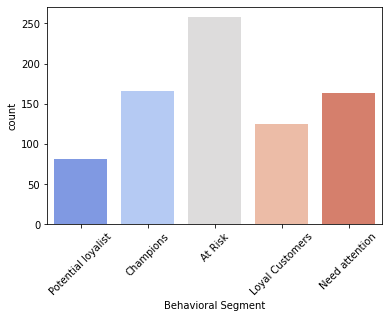

In [50]:
customer_behavior = sns.countplot(data = rfm, x = "Behavioral Segment",  hue = "Behavioral Segment", palette = "coolwarm")
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='Recency', ylabel='Count'>

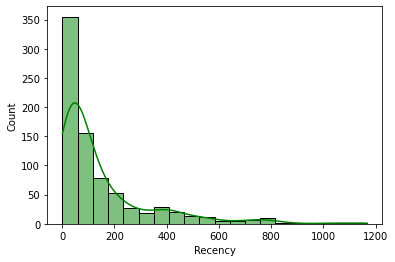

In [51]:
sns.histplot(data = rfm, x = "Recency", bins = 20, kde = True, color = "green")

<Axes: xlabel='Frequency', ylabel='Count'>

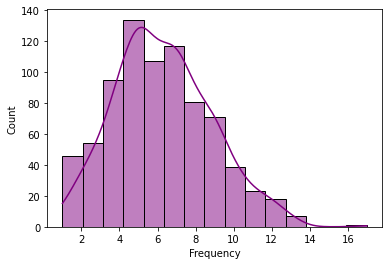

In [52]:
sns.histplot(data = rfm, x = "Frequency", bins = 15, kde = True, color = "purple")

<Axes: xlabel='Monetary', ylabel='Count'>

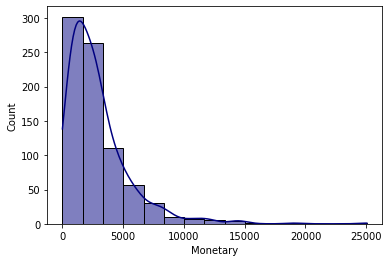

In [53]:
sns.histplot(data = rfm , x = "Monetary", bins = 15, kde =True, color = "navy")

In [54]:
rfm_heatmap = rfm.groupby(["R_Score", "F_Score"])["Monetary"].mean().unstack()

In [55]:
rfm_heatmap

F_Score,1,2,3,4,5
R_Score,,,,,
1,1205.761233,2587.977750,2249.275000,3838.751429,5323.662308
2,1214.948750,1978.501176,2218.581538,4606.485588,3724.446923
3,1392.549130,3227.122647,2938.240645,3405.640000,3801.845161
4,1858.687059,2343.369231,3424.323529,3469.245385,4860.617750
5,1082.292273,1813.151250,2695.550345,3372.221842,4320.915102


<Axes: xlabel='F_Score', ylabel='R_Score'>

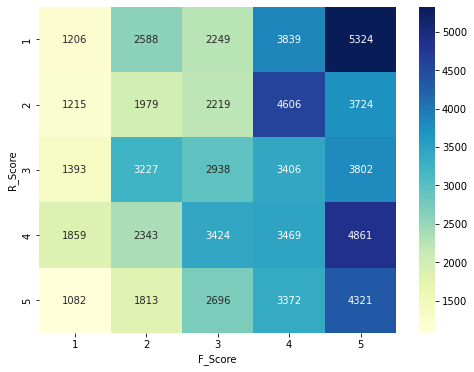

In [56]:
plt.figure(figsize = (8,6))
sns.heatmap(rfm_heatmap, cmap = "YlGnBu", annot = True, fmt = ".0f")